<a href="https://colab.research.google.com/github/Matheusvfvitor/R/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**

Realizar uma análise exploratória com os dados divulgados pela OMS sobre a evolução do CoVid19 (Corona Vírus) no planeta.

**Backaground**

Na última terça-feira(12) a OMS classificou a evolução dos casos de CoVid19 como uma Pandemia, que seria o último estágio de proliferação de um vírus quando ele atinge escala global, ou seja presente em todos os continentes.

Com essa análise vamos verificar fatores importantes como por quais regiões o vírus se propogou, como está a taxa de mortalidade do vírus, e como se deu a evolução do número de casos, nos últimos 20 dias.

**Ferramentas utilizadas**

Para realização desse trabalho utilizei a linguagem .R , por escolha pessoal, entretanto as mesmas análises poderiam ter sido realidas com a liguagem python.


**Dataset**

O dataset (*.csv) contém os dados até o dia 07/03 por isso como a evolução é diária os dados foram congelados nessa data para análise, contudo devo atualizar esse estudo ao final do mês de março com os valores atualizados.



---


Vamos lá....




In [0]:
#Instalando os Pacotes

library(tidyr)
library(dplyr)
library(ggplot2)
library(treemap)
library(maps)


In [30]:
# Lendo os arquivos do dataset
smmy = read.csv("c19_data.csv")

head(smmy)


,Province.State,Country.Region,Lat,Long,Date,Confirmed,Deaths,Recovered
,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>
1,Anhui,Mainland China,31.8257,117.2264,1/22/20,1,0,0
2,Beijing,Mainland China,40.1824,116.4142,1/22/20,14,0,0
3,Chongqing,Mainland China,30.0572,107.8740,1/22/20,6,0,0
4,Fujian,Mainland China,26.0789,117.9874,1/22/20,1,0,0
5,Gansu,Mainland China,36.0611,103.8343,1/22/20,0,0,0
6,Guangdong,Mainland China,23.3417,113.4244,1/22/20,26,0,0


**Vamos iniciar pela limpeza..**


Em uma análise de dados mais de 50% do trabalho está no trabalho de limpeza e captura do banco de dados, como tive sorte esse dataset que encontrei não possui muita coisa a ser ajustada, mesmo assim precisaremos fazer diversas manipulações nele para que os resultados sejam os resultados que esperamos.

Vamos começar reduzindo um pouco o tamanho do dataset para essa primeira rodada de análises, retirando os valores de estado (Province.State) , latitude(Lat) e logitude(Long)


Como você vai verificar no dataset não possui valores NA ou missing, então nesse caso não teremos muito trabalho para retrabalhar os dados nesse momemnto e podemos começar a manipulação para gerar insights

In [31]:
c19 = smmy
c19$Province.State = NULL
c19$Lat = NULL
c19$Long = NULL
str(c19)
summary(c19)

'data.frame':	10350 obs. of  5 variables:
 $ Country.Region: Factor w/ 102 levels "Afghanistan",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Date          : Factor w/ 46 levels "1/22/20","1/23/20",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Confirmed     : int  1 14 6 1 0 26 2 1 4 1 ...
 $ Deaths        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int  0 0 0 0 0 0 0 0 0 0 ...


        Country.Region      Date        Confirmed            Deaths        
 US            :3772   1/22/20: 225   Min.   :    0.00   Min.   :   0.000  
 Mainland China:1426   1/23/20: 225   1st Qu.:    0.00   1st Qu.:   0.000  
 Australia     : 368   1/24/20: 225   Median :    0.00   Median :   0.000  
 Canada        : 276   1/25/20: 225   Mean   :  230.21   Mean   :   6.826  
 Afghanistan   :  46   1/26/20: 225   3rd Qu.:    2.75   3rd Qu.:   0.000  
 Algeria       :  46   1/27/20: 225   Max.   :67666.00   Max.   :2959.000  
 (Other)       :4416   (Other):9000                                        
   Recovered       
 Min.   :    0.00  
 1st Qu.:    0.00  
 Median :    0.00  
 Mean   :   71.24  
 3rd Qu.:    0.00  
 Max.   :43500.00  
                   

Agora vamos agrupar os valores que contém China Mainland e China, porém para isso precisamos primeiro alterar os dados de factor para char , caso contrário ele gera um erro.


In [0]:
c19$Country.Region = as.character(c19$Country.Region)
c19[c19$Country.Region =="Mainland China",1] = "China"

In [33]:
c19 = c19 %>% group_by(Date,Country.Region) %>% summarise(Confirmed = sum(Confirmed), Deaths = sum(Deaths), Recovered = sum(Recovered))
c19

Date,Country.Region,Confirmed,Deaths,Recovered
<fct>,<chr>,<int>,<int>,<int>
1/22/20,Afghanistan,0,0,0
1/22/20,Algeria,0,0,0
1/22/20,Andorra,0,0,0
1/22/20,Argentina,0,0,0
1/22/20,Armenia,0,0,0
1/22/20,Australia,0,0,0
1/22/20,Austria,0,0,0
1/22/20,Azerbaijan,0,0,0
1/22/20,Bahrain,0,0,0


Ai está o nosso primeiro data_frame para inciar a geração de insights, porém antes precisaremos configurar a coluna Date como Date, e não como "char".

Ainda nessa etapa vamos buscar o relatório com os ultimos dados disponíveis do dataset.

In [34]:
c19$Date = as.character(c19$Date)
c19$Date = as.Date(c19$Date,format = "%m/%d/%Y")
last_date = max(c19$Date)
last = c19[c19$Date == last_date,] ##Report do ultimo dia de referência do dataset
day_by_day = c19 %>% group_by(Date) %>% summarise(Confirmed = sum(Confirmed), Deaths = sum(Deaths), Recovered = sum(Recovered)) #Avaliaçaõ dia a dia do dataset.

head(last)

head(day_by_day)

Date,Country.Region,Confirmed,Deaths,Recovered
<date>,<chr>,<int>,<int>,<int>
20-03-07,Afghanistan,1,0,0
20-03-07,Algeria,17,0,0
20-03-07,Andorra,1,0,0
20-03-07,Argentina,8,0,0
20-03-07,Armenia,1,0,0
20-03-07,Australia,63,2,21


Date,Confirmed,Deaths,Recovered
<date>,<int>,<int>,<int>
20-01-22,555,17,28
20-01-23,653,18,30
20-01-24,941,26,36
20-01-25,1434,42,39
20-01-26,2118,56,52
20-01-27,2927,82,61


Em nosso primeiro gráfico vamos visualizar a evolução do Covid19 dia a dia Casos confirmados, Recuperados e Ativos


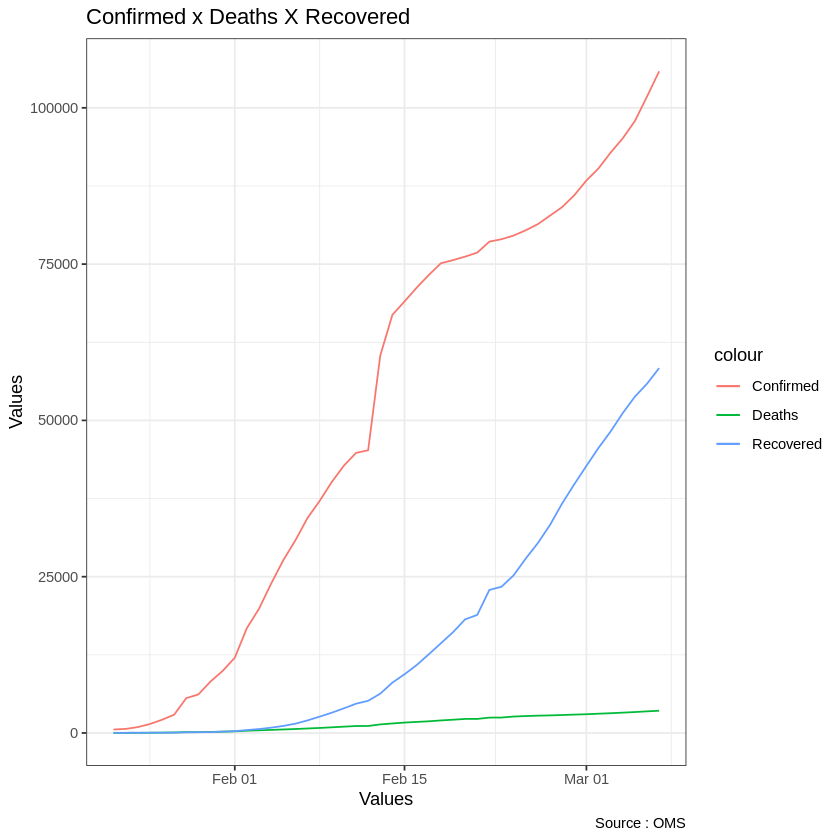

In [35]:
## Evolução do Covid_19 dia a dia
ggplot(day_by_day,aes(x = Date)) +
  geom_line(aes(y = Confirmed, color = "Confirmed"))+
  geom_line(aes(y = Deaths, color = "Deaths"))+
  geom_line(aes(y = Recovered, color = "Recovered"))+
  theme_bw()+
  labs(title = "Confirmed x Deaths X Recovered", y = "Values", x = "Values", caption="Source : OMS" )

Podemos perceber um crescimento vertiginoso do gráfico apartir do mês de fevereiro,  mas qual o grau de contribuição de cada país para isso. 😨

Então vamos analisar os 20 países que mais contribuiram para a quantidade de casos confirmados no último dia

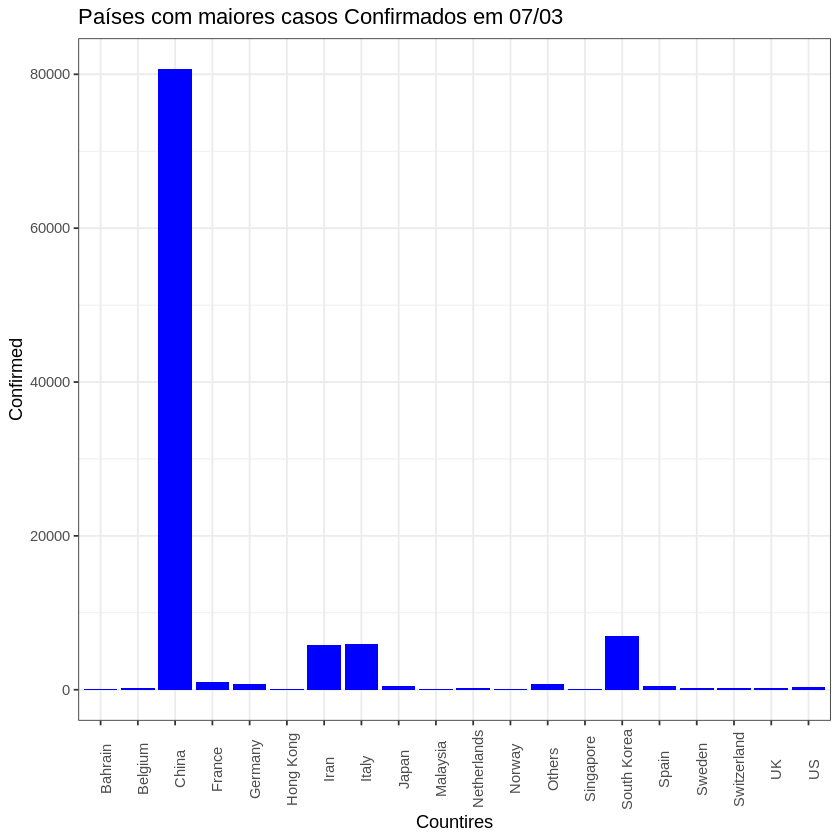

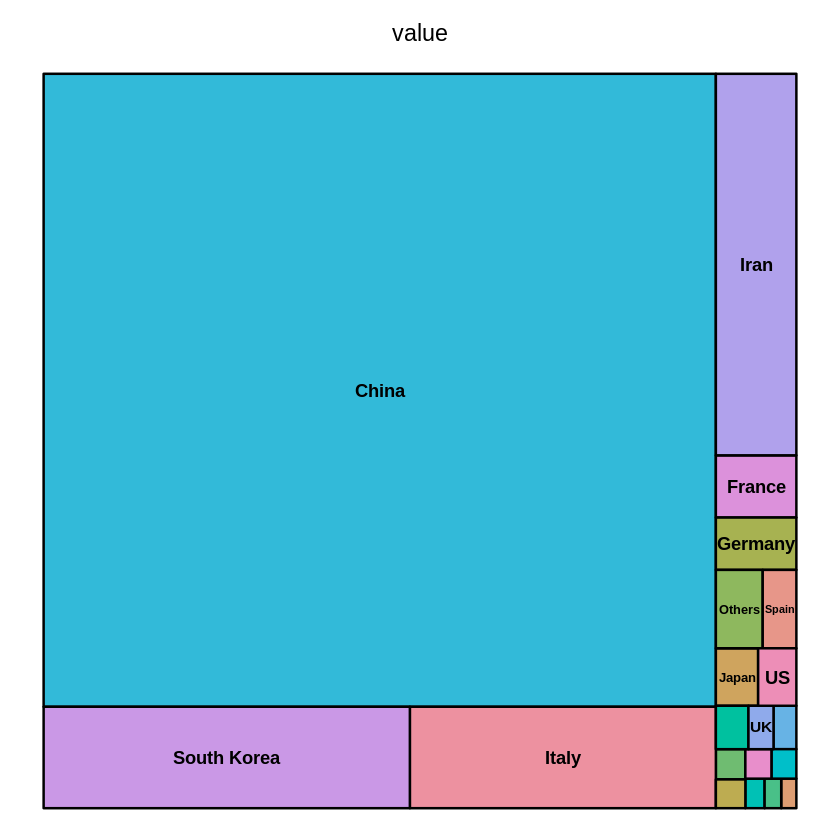

In [60]:
lt = last %>% top_n(20,Confirmed)

ggplot(lt,aes(x = Country.Region, y=Confirmed))+
  geom_col(fill = "blue")+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Países com maiores casos Confirmados em 07/03", y = "Confirmed", x = "Countires")

  group <- lt$Country.Region
value <- lt$Confirmed
data <- data.frame(group,value)

treemap(data,index="group",vSize="value",type="index")

Sem novidades até aqui a china é disparada o país com mais casos, o número de casos é tão grande que até acaba prejudicando a análise e não conseguimos verificar com mais cuidado os outro Top 19, então vamos avaliar o como está o comportamento quando fazemos a avaliação sem a China.


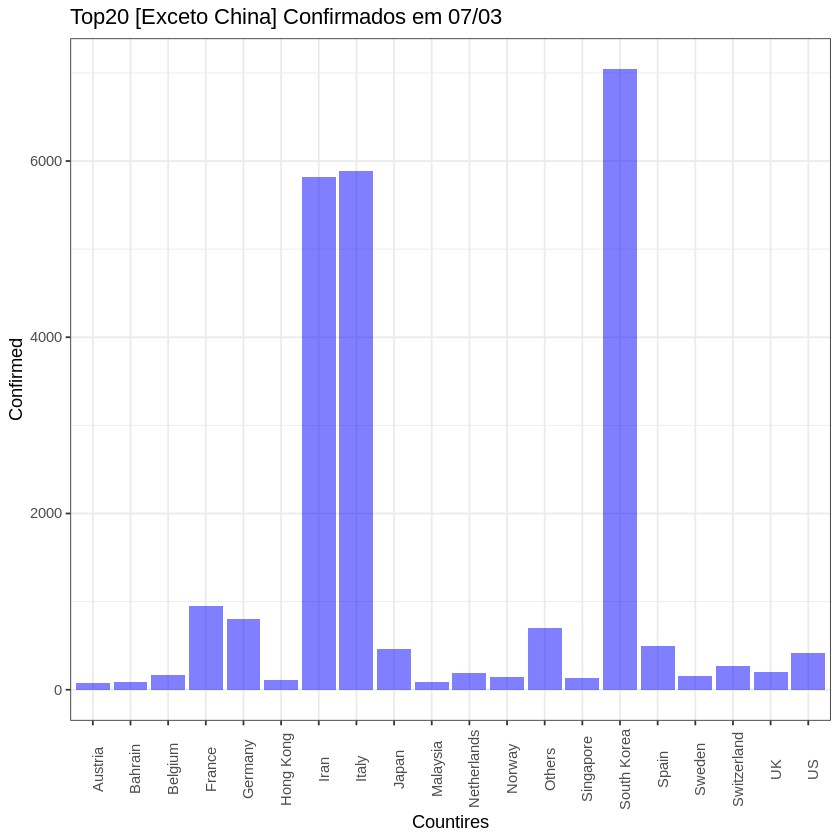

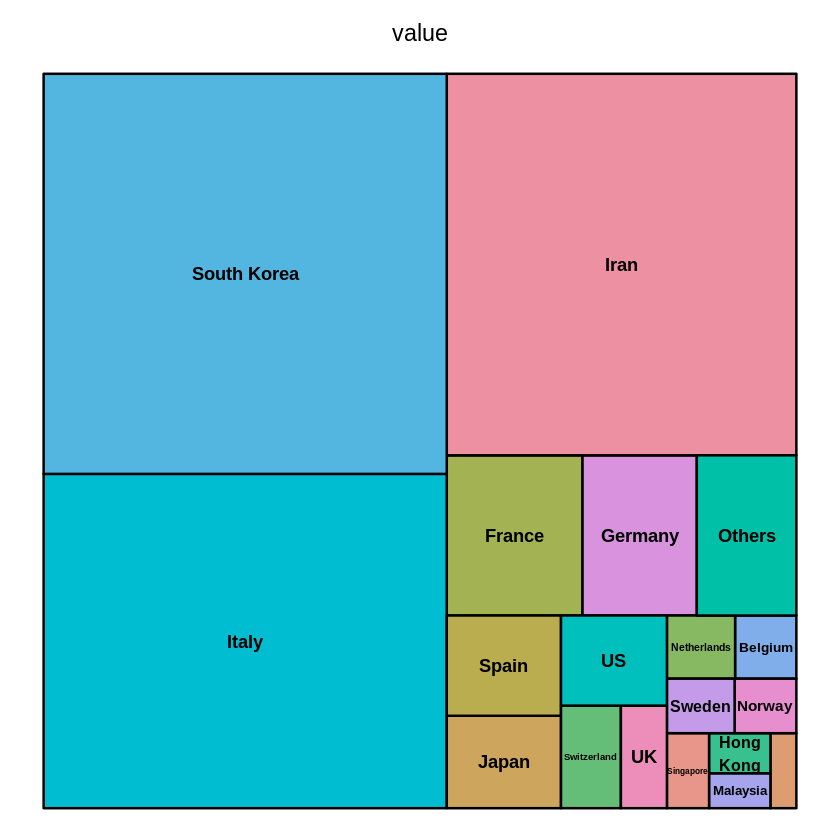

In [66]:
lt_china = last[last$Country.Region != "China",] %>% top_n(20,Confirmed)

ggplot(lt_china,aes(x = Country.Region, y=Confirmed))+
  geom_col(fill = "blue", alpha = 0.5)+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 [Exceto China] Confirmados em 07/03", y = "Confirmed", x = "Countires")

#Treemap
lt_without_China = lt %>% filter(Country.Region != "China")
group <- lt_without_China$Country.Region
value <- lt_without_China$Confirmed
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

Agora que ja conseguimos perceber como está o status de casos confirmados vamos expandir um pouco a análise, mas para isso precisaremos manipular o nosso dataset, agrupando colunas em linhas para facilitar a visualização para isso utilziaremos os pacotes tidyr e dplyr

O que iremos fazer é agrupar as colunas confirmed, deaths, recovered para uma única coluna chamada status, isso nos trará a possibilidade de agrupar os valores como fatores nos mesmos gráficos facilitando a visualização

vamos fazer 3 novos data_frames :
1. c19_gather, que trará os dados dia por dia
2. lt_gather , que trará os dados do ultimo dia disponível no dataset (top 20)
3. lt_gather , que trará os dados do ultimo dia disponível porém sem a China (top 19)



In [46]:
c19_gather = gather(last,key="status",value="number",Confirmed,Deaths,Recovered)
lt_gather = gather(lt,key="status",value="number",Confirmed,Deaths,Recovered)
lt_china_gather = gather(lt_china,key="status",value="number",Confirmed,Deaths,Recovered)

head(c19_gather)

head(lt_gather)


head(lt_china_gather)

Date,Country.Region,status,number
<date>,<chr>,<chr>,<int>
20-03-07,Afghanistan,Confirmed,1
20-03-07,Algeria,Confirmed,17
20-03-07,Andorra,Confirmed,1
20-03-07,Argentina,Confirmed,8
20-03-07,Armenia,Confirmed,1
20-03-07,Australia,Confirmed,63


Date,Country.Region,status,number
<date>,<chr>,<chr>,<int>
20-03-07,Bahrain,Confirmed,85
20-03-07,Belgium,Confirmed,169
20-03-07,China,Confirmed,80652
20-03-07,France,Confirmed,949
20-03-07,Germany,Confirmed,799
20-03-07,Hong Kong,Confirmed,108


Date,Country.Region,status,number
<date>,<chr>,<chr>,<int>
20-03-07,Austria,Confirmed,79
20-03-07,Bahrain,Confirmed,85
20-03-07,Belgium,Confirmed,169
20-03-07,France,Confirmed,949
20-03-07,Germany,Confirmed,799
20-03-07,Hong Kong,Confirmed,108


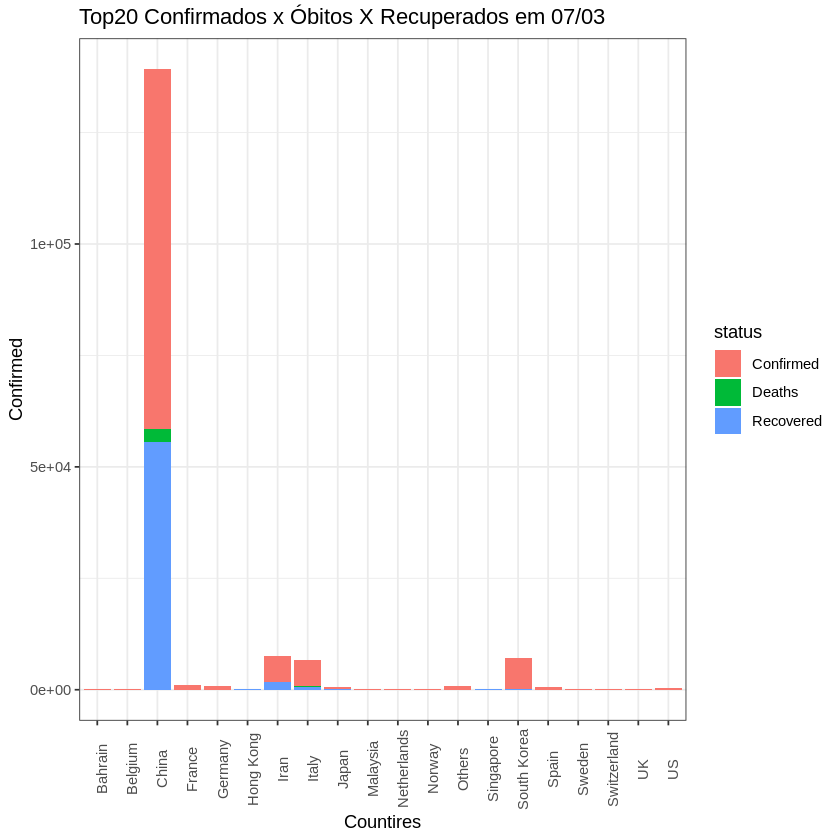

In [51]:
ggplot(lt_gather,aes(x=Country.Region, y=number, fill = status ))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 Confirmados x Óbitos X Recuperados em 07/03", y = "Confirmed", x = "Countires")

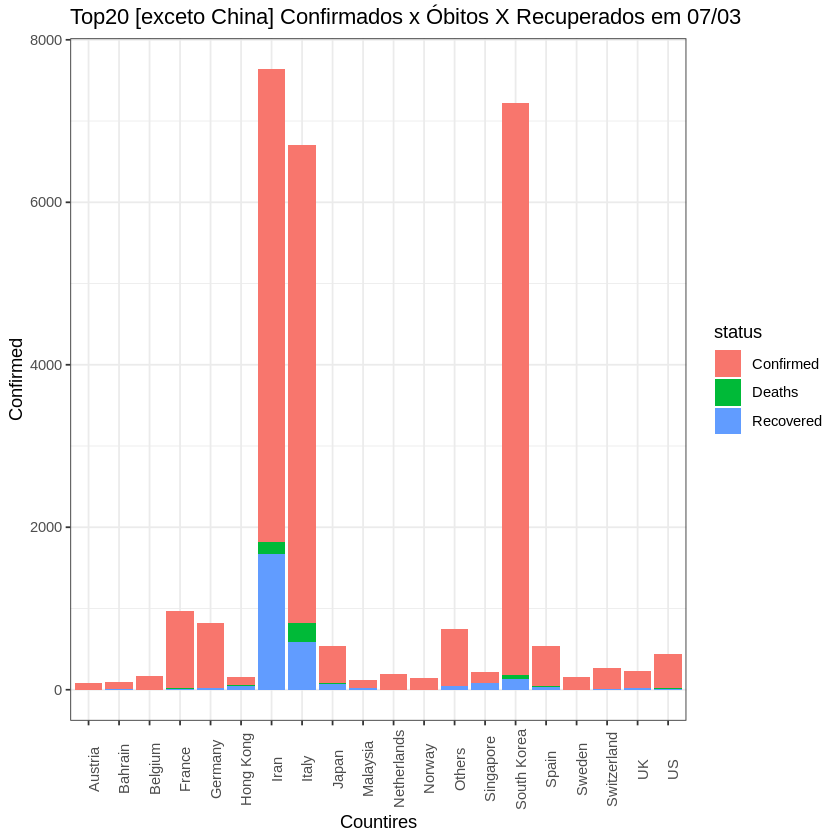

In [54]:
ggplot(lt_china_gather,aes(x=Country.Region, y=number, fill = status ))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 [exceto China] Confirmados x Óbitos X Recuperados em 07/03", y = "Confirmed", x = "Countires")

Avaliando os dois gráficos acima podemos perceber que apesar da contaminação ser muito fácil e rápida o número de casos de óbito é baixo com relação aos infectados, ainda pode-se notar que não há relação proporcial entre o número de infectados e o de óbitos (vamos continuar explorando mais abaixo).

Como podemos ver a taxa de mortalidade da Itália é maior do que a taxa de mortalidade do iran, veremos em mais detalhes nas próximas etapas. Isso se dá devido o fato de a Itália possuir uma quantidade de idosos em circulação muito maior do que no Iran por exemplo. A itália é destino frequente de aposentados para passar as férias. Além disso mais de 15% da população europeia tem mais de 50 anos.
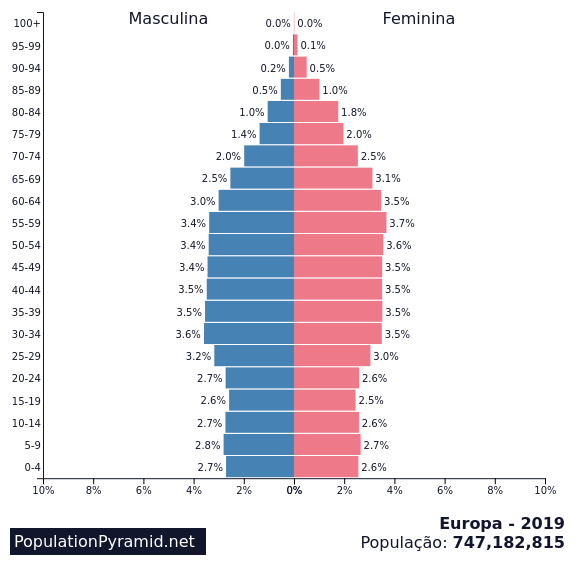

*não encontrei um dataset com a idade dos infectados então, não será possível comprovar nesse estudo essa relação (óbitos, x idade dos infectados), entretanto ela ja foi comprovada em outros estudos vide a matéria abaixo.

https://www.bbc.com/portuguese/brasil-51539986

Em próximos estudos futuros irei realizar uma avaliação mais profunda sobre a relação dos infectados com a faixa etária e os demais episódios de epidemia como (H1N1, Ebola etc).


Agora vamos aprofundar a análise na taxa de mortalidade do vírus ou seja , a quantidade de óbitos por casos confirmados.

Nessa avaliação podemos verificar que a taxa de mortalidade gira entre 2,5 e 3,0 %. Podemos verificar alguns países como o Paquistão e San Marino que possuem número de casos extremamente baixo.

Gostaria de destacar Itália e USA, são países com a taxa de mortalidade extremamente alta próxima de 4,0%.

A demora na adoção de medidas mais drásticas de controle epidomológico, higiene e controle influencia de maneira negativa auxiliando o rápido avanço dos casos.

Podemos ver o exemplo positivo da Coreia do Sul que apesar do país ser um dos mais infectados a taxa de mortaldiade do vírus não chega a 1%. Isso se dá devido a medidas de segurança, higiene e controle epidemológico adotados pelo país que estão sendo muito bem sucedidos no controle do vírus.

Date,Country.Region,Confirmed,Deaths,Recovered,Mortality
<date>,<chr>,<int>,<int>,<int>,<dbl>
20-03-07,Australia,63,2,21,3.1746032
20-03-07,China,80652,3070,55478,3.8064772
20-03-07,France,949,11,12,1.1591149
20-03-07,Hong Kong,108,2,51,1.8518519
20-03-07,Iran,5823,145,1669,2.4901254
20-03-07,Iraq,54,4,0,7.4074074
20-03-07,Italy,5883,233,589,3.9605643
20-03-07,Japan,461,6,76,1.3015184
20-03-07,Netherlands,188,1,0,0.5319149


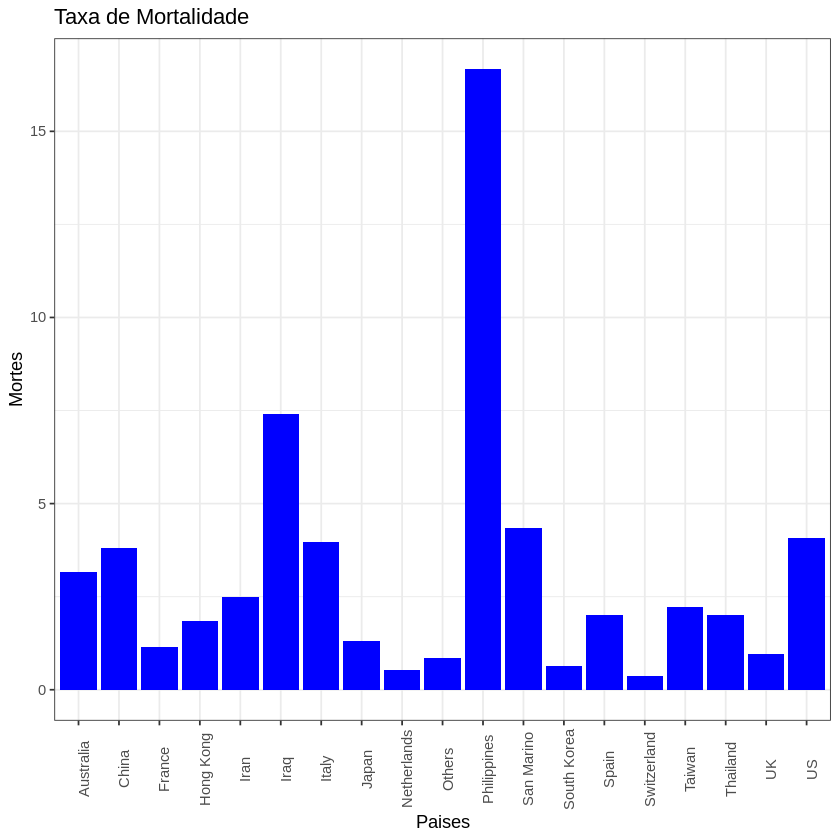

In [71]:
lt_deaths = last[last$Deaths>=1,]

lt_deaths = lt_deaths %>% mutate(Mortality = (Deaths/Confirmed)*100)

lt_deaths

ggplot(lt_deaths, aes(x = Country.Region, y = Mortality))+
  geom_col(fill = "blue")+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Taxa de Mortalidade", y = "Mortes", x = "Paises")

Agora avaliando os números absolutos de óbitos do Corona Vírus, com e sem a China


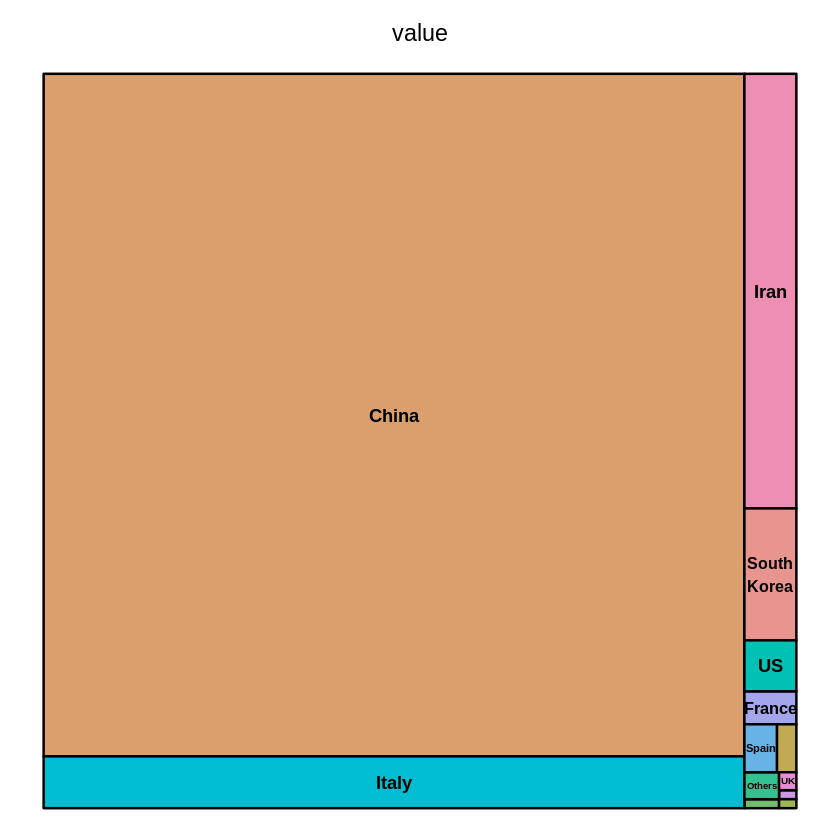

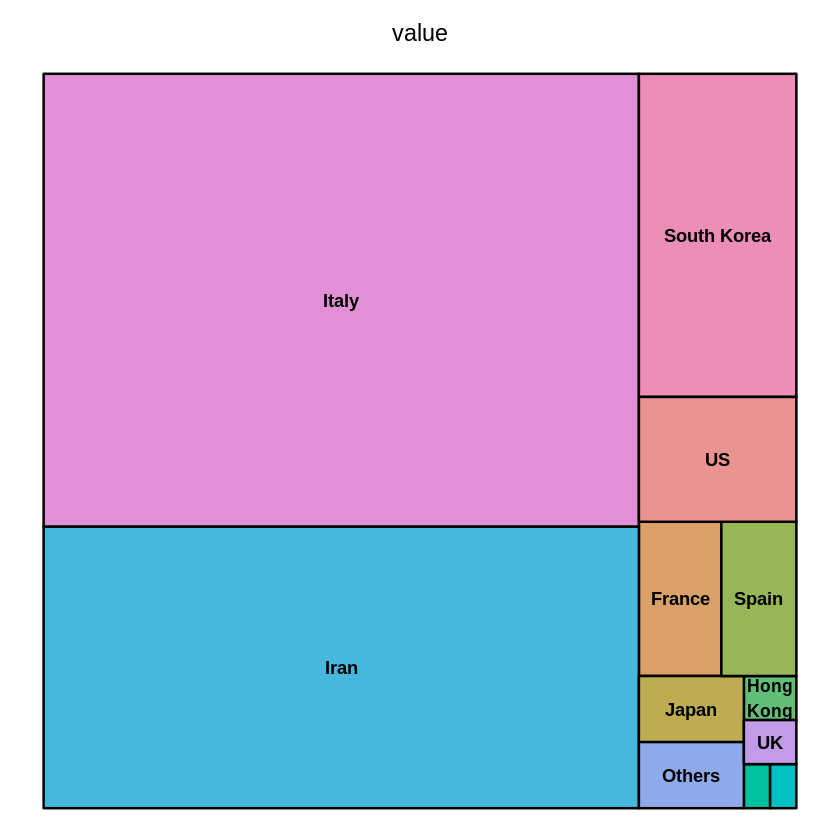

In [70]:
group <- lt$Country.Region
value <- lt$Deaths
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

##Deaths Without China
lt_without_China = lt %>% filter(Country.Region != "China")
group <- lt_without_China$Country.Region
value <- lt_without_China$Deaths
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

**Vamos avaliar a evolução dos casos do Covid_19 ao longo do tempo**



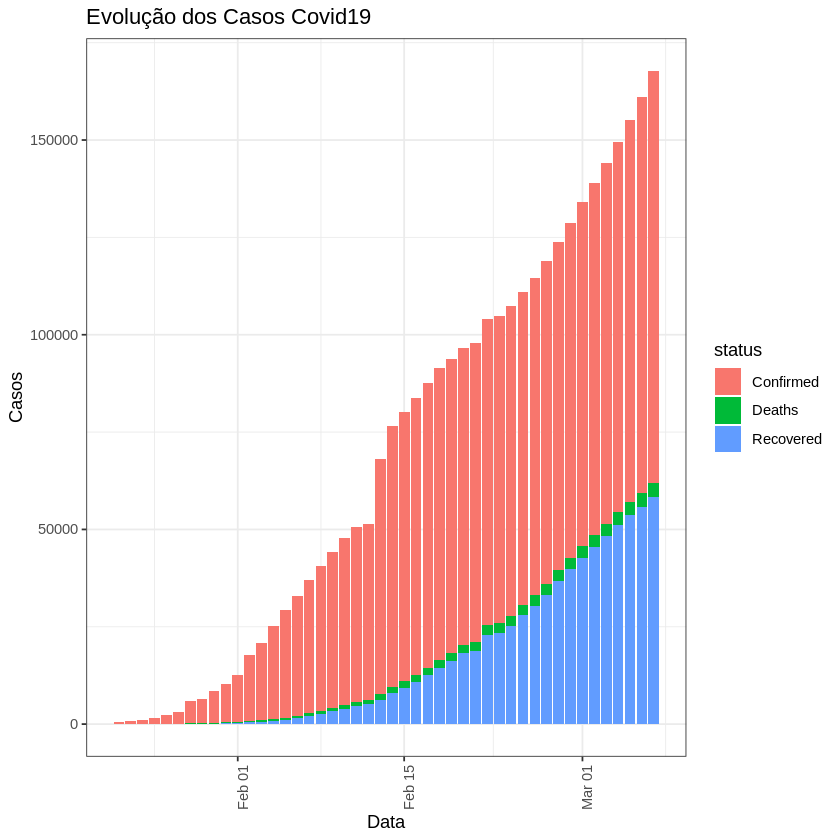

In [74]:
data = c19 %>% gather(key ="status",value="value",Confirmed,Deaths,Recovered)
data = data %>% filter(value >0)

ggplot(data, aes(x = Date , y = value, fill= status))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Evolução dos Casos Covid19", y = "Casos", x = "Data")

In [0]:
ggplot(data, aes(x = Date , y = value, fill= Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Taxa de Mortalidade", y = "Mortes", x = "Paises")

  #Como ficou dificil de ver, vou postar a imagem do R.studio aqui em baixo.

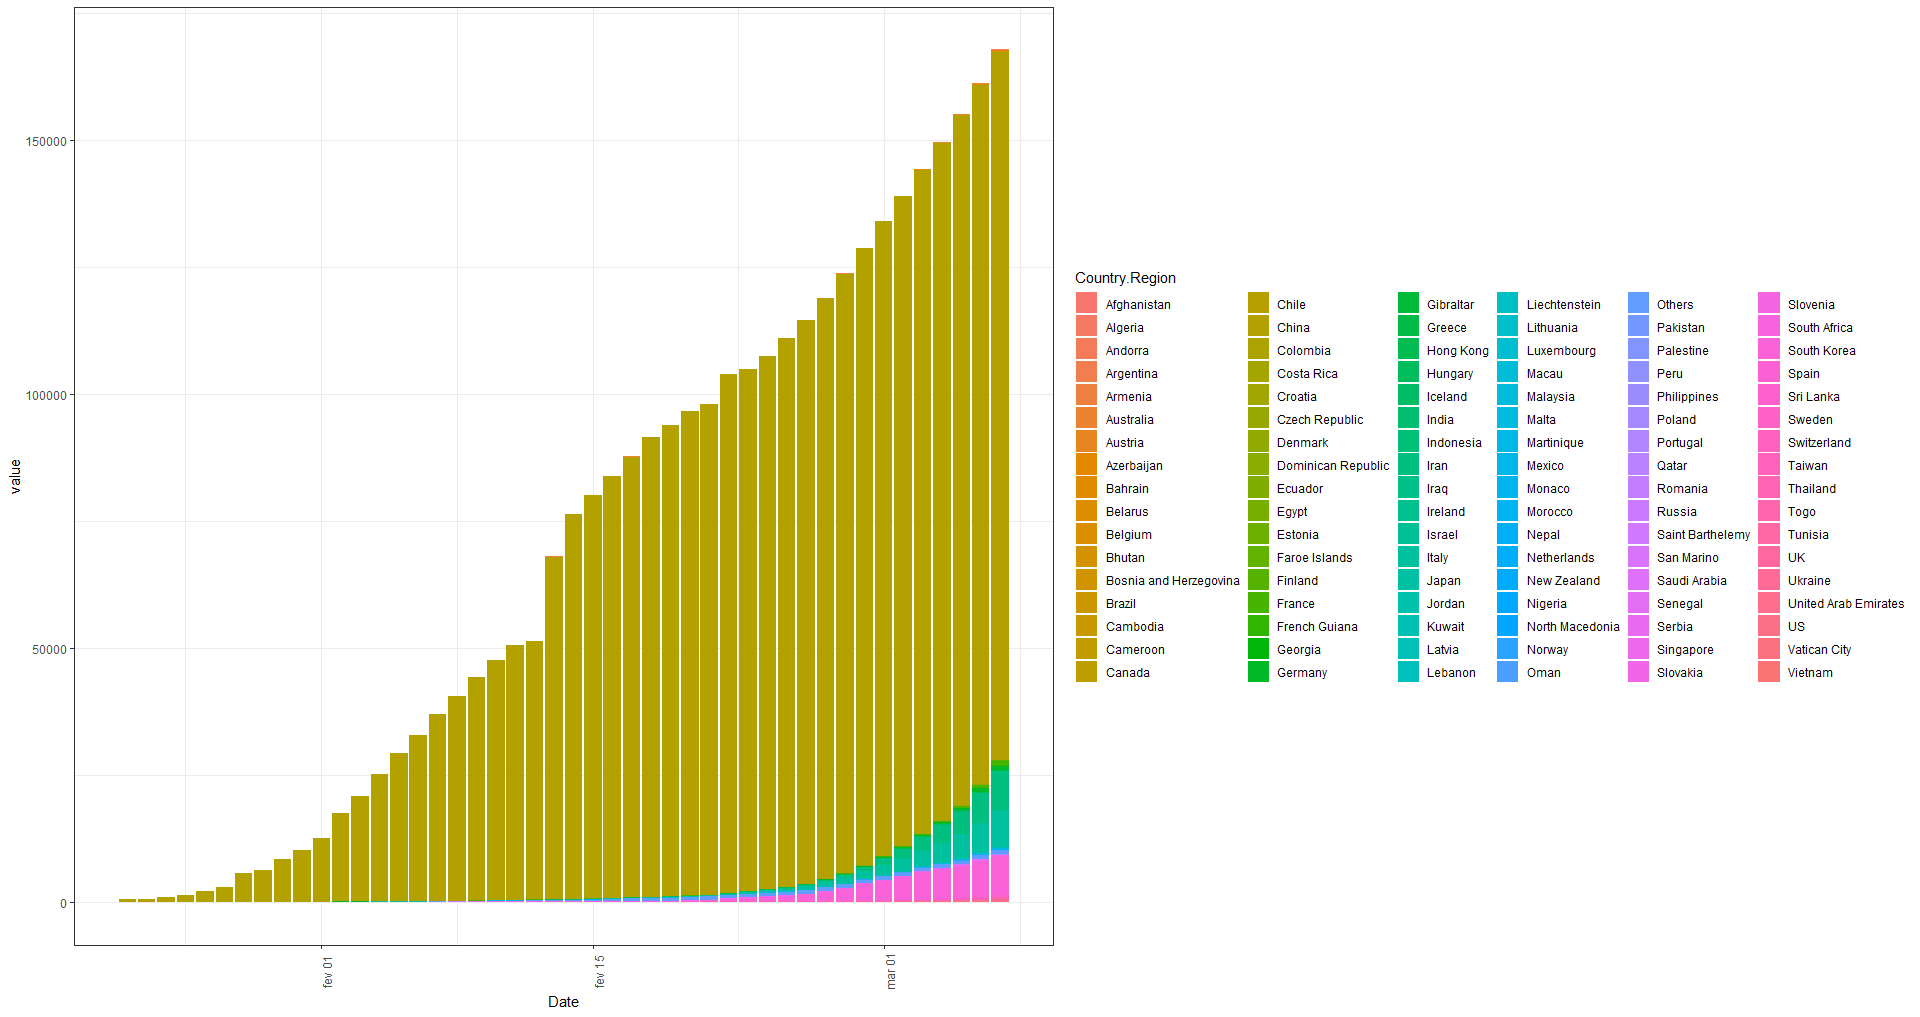

**Avaliando os dados da China individualmente**

Olhando os Dados abaixo somente da evolução dentro do país Oriental, podemos perceber que o número de casos confirmdos está subindo em uma proporção menor do que a de casos recuperados, enquanto o número de mortes permanece "controlado".

É exatamente o Contrário do que está acontecendo neste momento no resto do Mundo , com uma curva de aceleração completamente diferente.

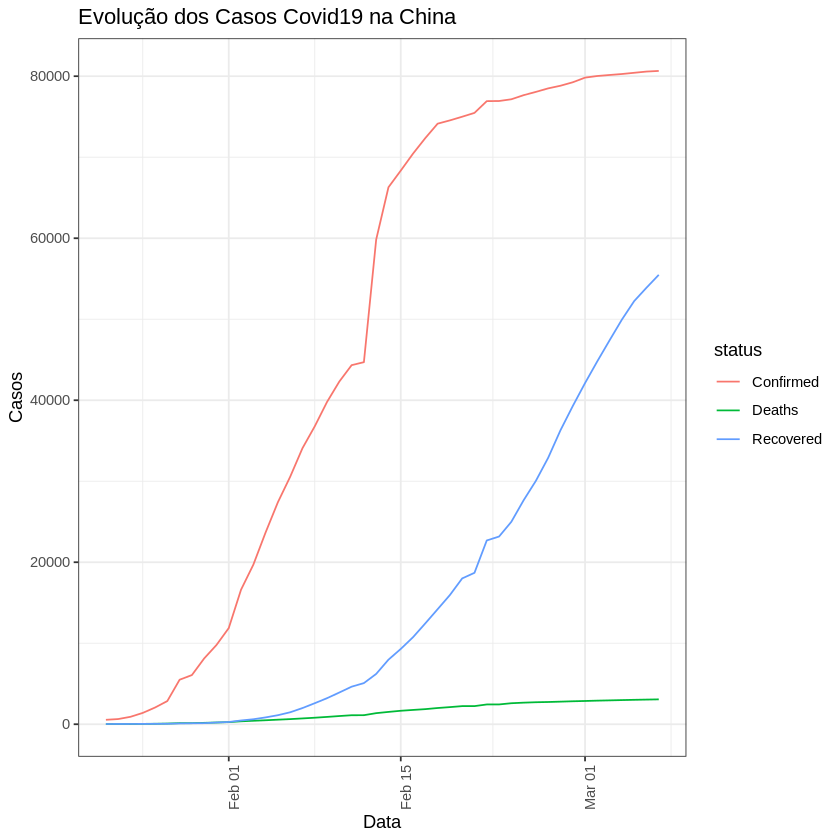

In [131]:
data_without_china = data[data$Country.Region =="China",]
ggplot(data_without_china, aes(x = Date , y = value, color= status))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Evolução dos Casos Covid19 na China", y = "Casos", x = "Data")


**Agora vamos fazer as análises desconsiderando a China**

> Indented block



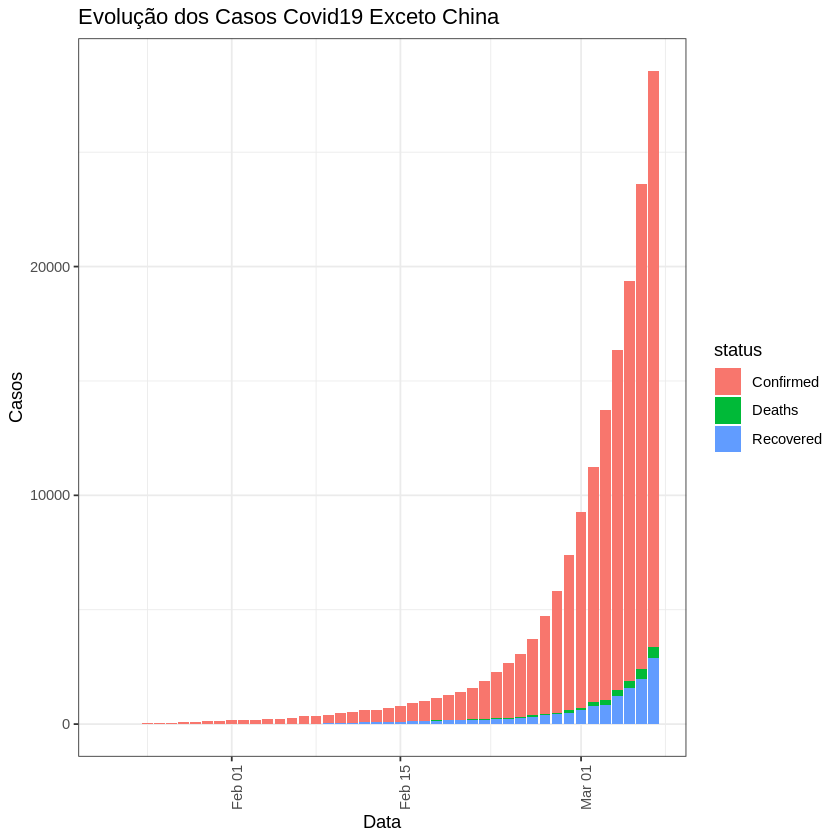

In [132]:
data_without_china = data[data$Country.Region !="China",]
ggplot(data_without_china, aes(x = Date , y = value, fill= status))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Evolução dos Casos Covid19 Exceto China", y = "Casos", x = "Data")

In [0]:
data_without_china = data[data$Country.Region !="China",]
ggplot(data_without_china, aes(x = Date , y = value, fill= Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Evolução dos Casos Covid19 Exceto China", y = "Casos", x = "Data")

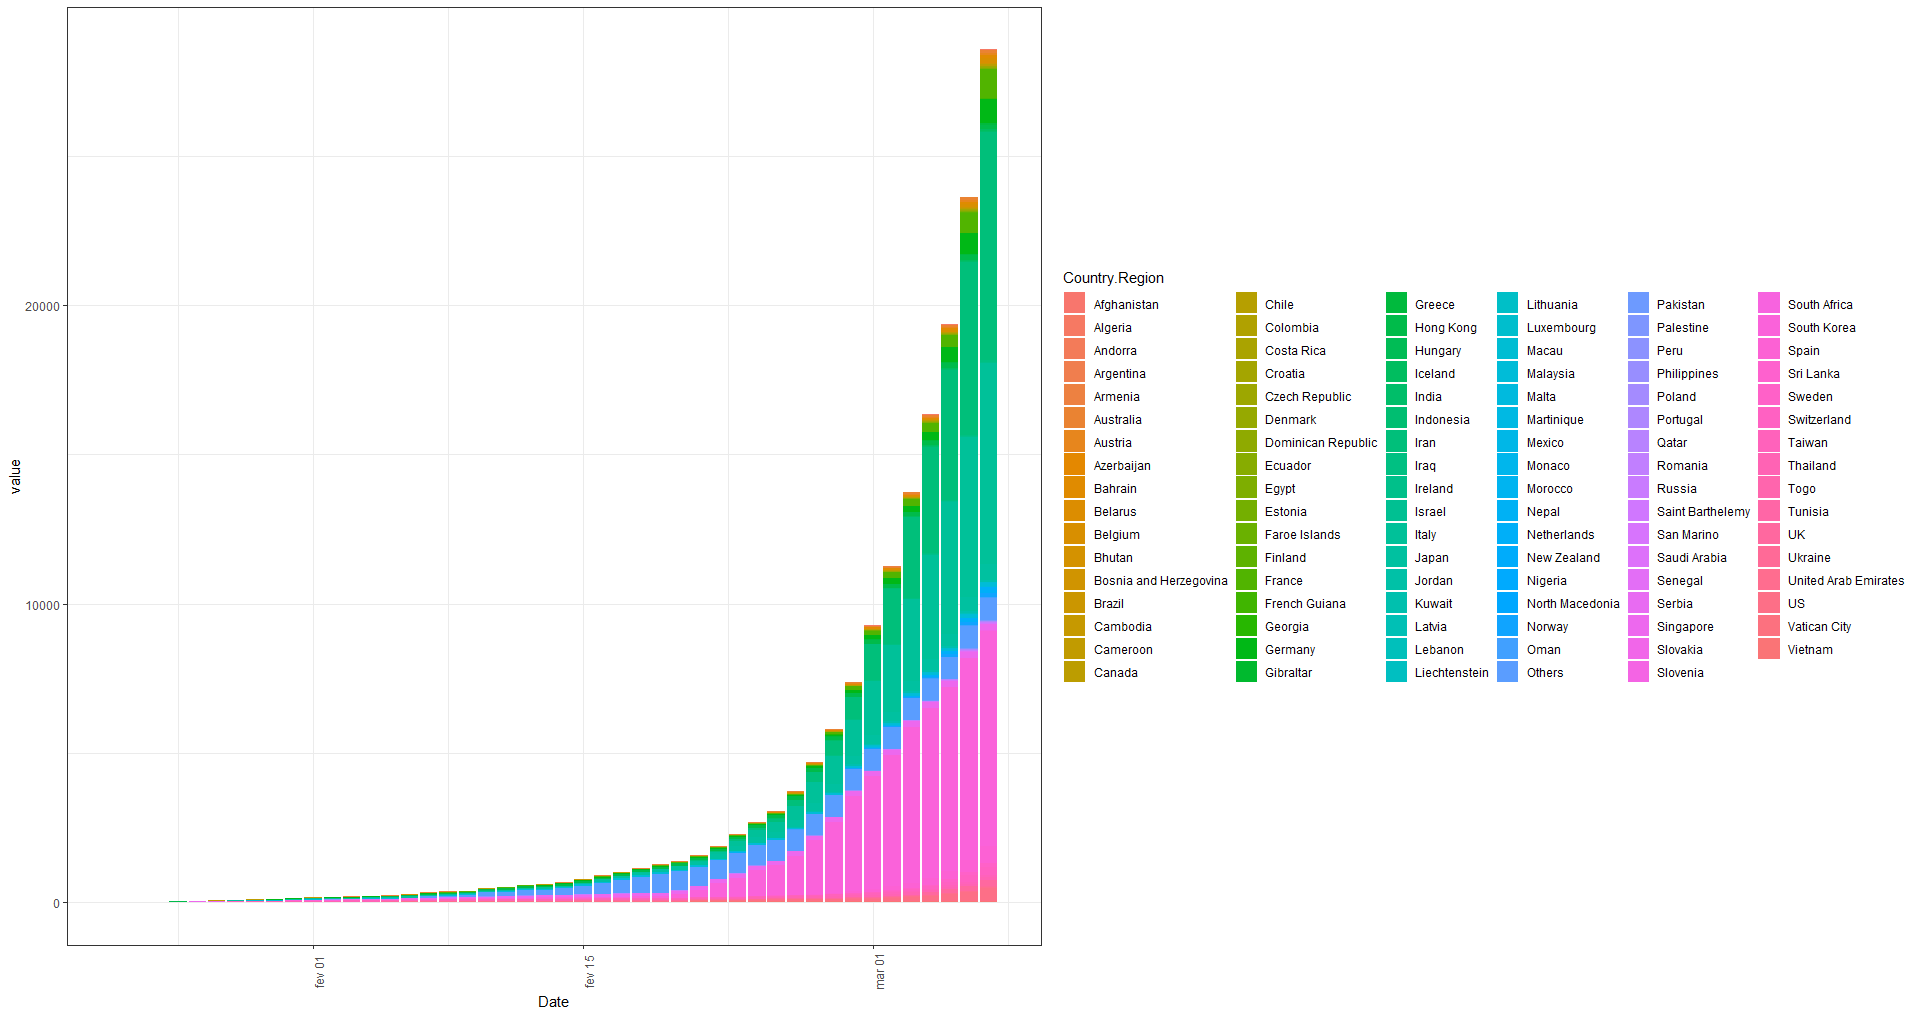

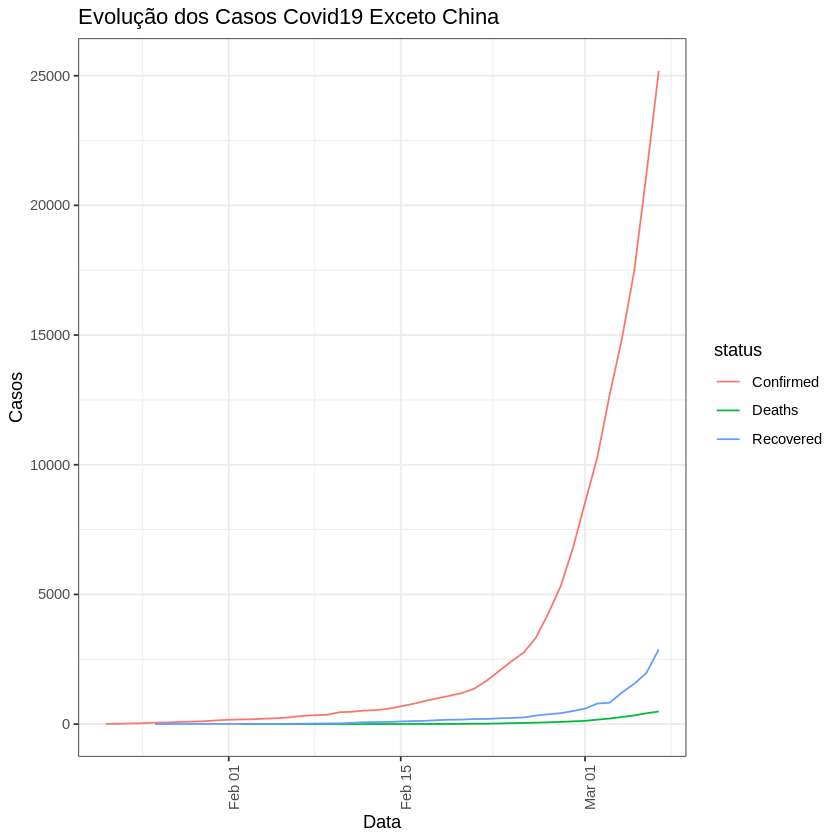

In [134]:
data_without_china = data[data$Country.Region !="China",]
data_without_china2 = data_without_china %>% group_by(Date, status) %>% summarise(Total = sum(value))

ggplot(data_without_china2, aes(x = Date , y = Total, color= status))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Evolução dos Casos Covid19 Exceto China", y = "Casos", x = "Data")

**Resto do Mundo**

Ao avaliar o Cenário da China isoladamente percebemos que existe uma tendência de estabalização dos casos, o contrário do que percebemos ao avaliar os dados do resto mundo, principalmente em países Ocidentais do Hemisfério Norte,se comprovando através do aumento vertiginoso dos casos nos EUA, Itália e Espanha.


**Agora vamos avaliar como o vírus ja se espalhou pelo mundo.**

Para isso vamos voltar ao dataset original , e aproveitar os dados de latitude e longitude , criando um novo dataframe

In [0]:
map_df = smmy
str(map_df)

map_df$Country.Region = as.character(map_df$Country.Region)
map_df$Province.State = NULL
map_df[map_df$Country.Region == "Mainland China",1] = "China"

map = map_data("world")

map_df = map_df %>% filter(Confirmed >0)

In [0]:
ggplot() +
  geom_polygon(data = map, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3)+
  geom_point(data=map_df, aes(x=Long, y=Lat, size=Confirmed), color = "blue", alpha= 0.5)+
  theme_classic()+
  labs(title = "Casos confirmados Global", y = "Casos", x = "Data")

Como a visualização do Notebook não está ajudando muito, vou colar aqui a imagem resultado do R.Studio. Nesse chart podemos ver os casos confirmados espalhados pelo globo.

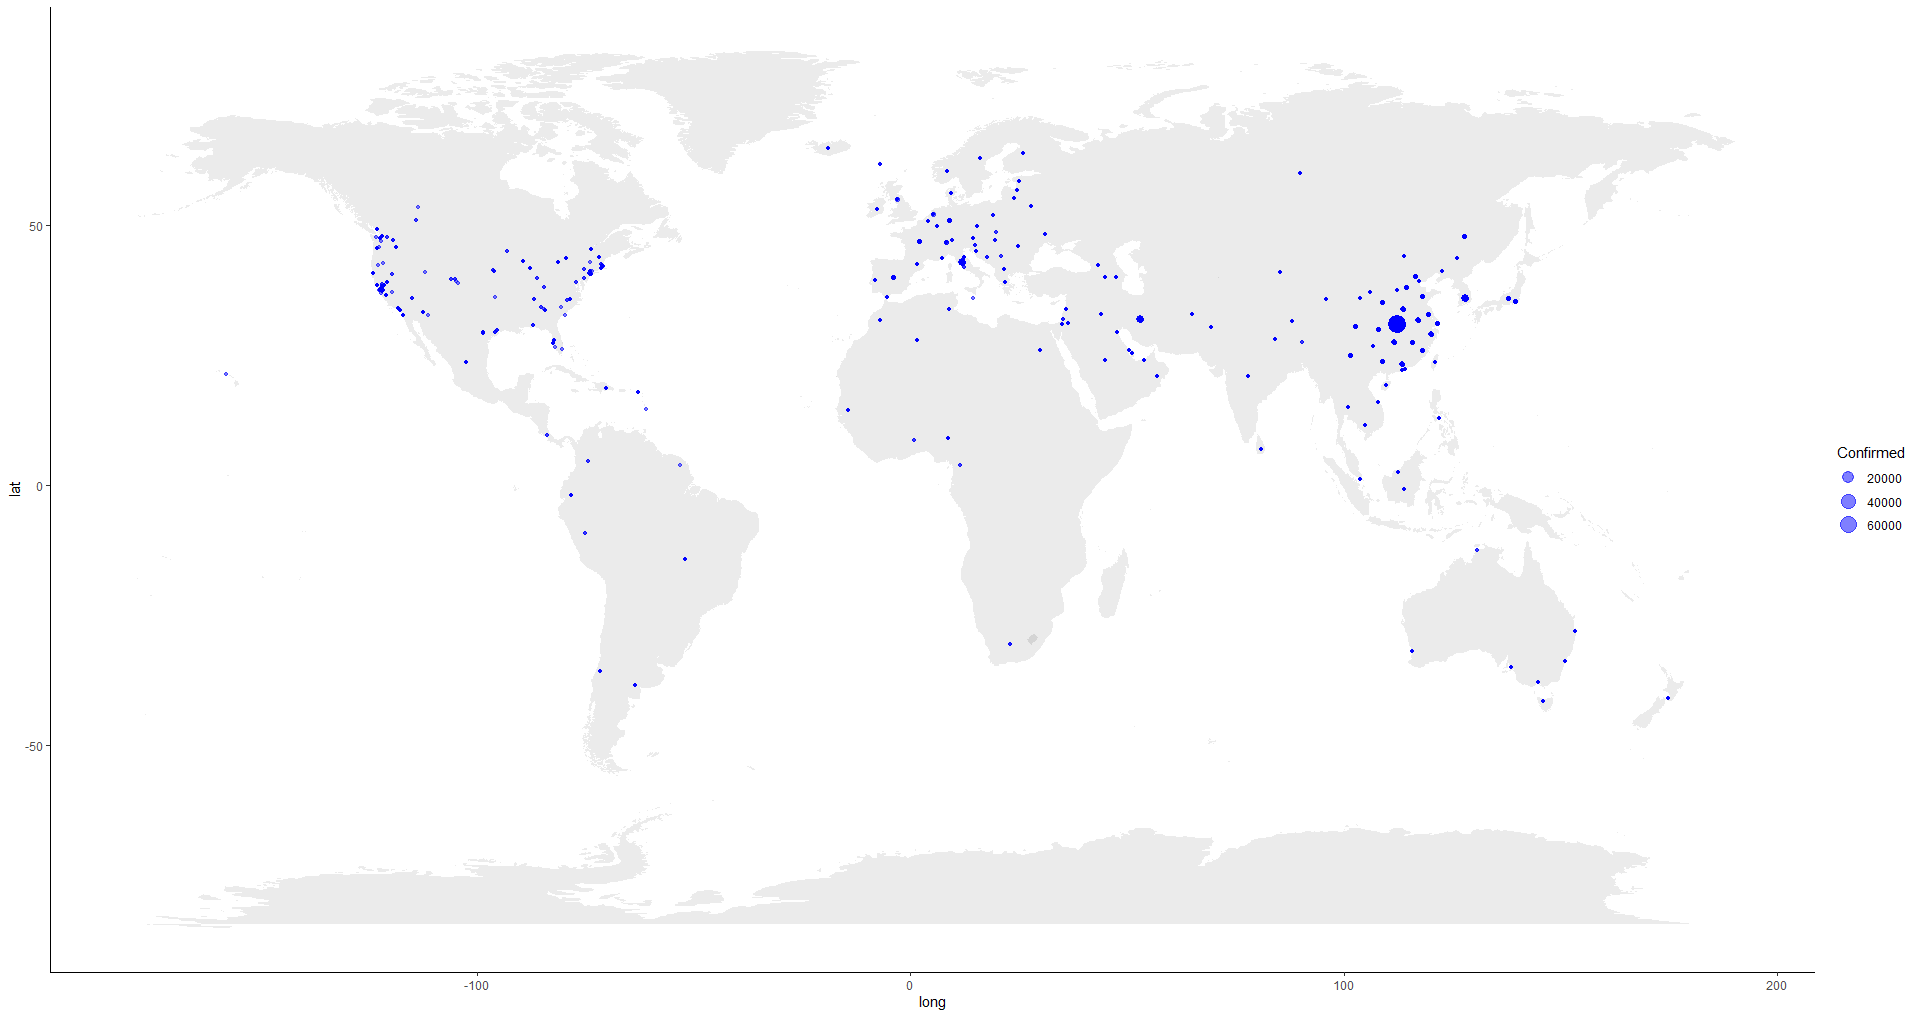

In [0]:
map_df_Deaths = map_df %>% filter( Deaths > 0)

ggplot() +
  geom_polygon(data = map, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3)+
  geom_point(data=map_df_Deaths, aes(x=Long, y=Lat, size=Deaths), color = "red", alpha= 0.5)+
  theme_classic()+
  labs(title = "Casos de Óbito Global", y = "Casos", x = "Data")

Agora vamos visualizar os casos de óbitos

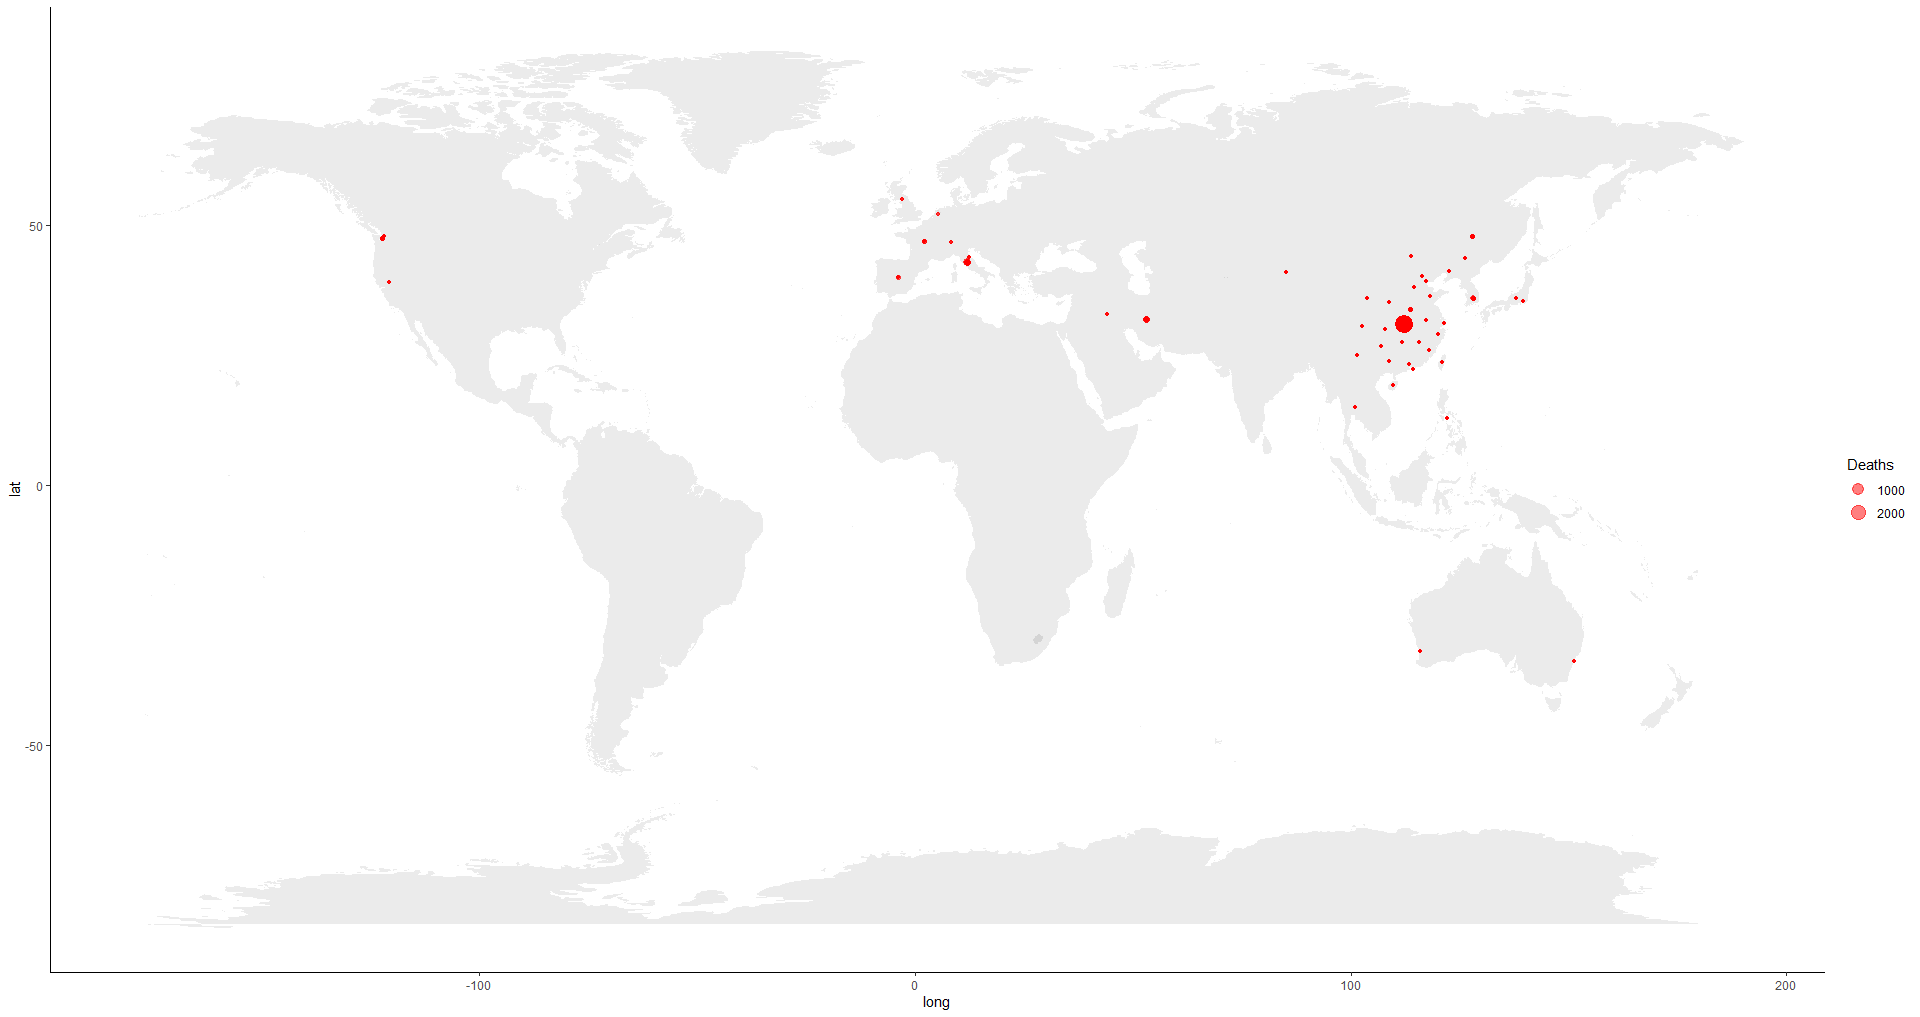

In [0]:
ggplot() +
  geom_polygon(data = map, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3)+
  geom_point(data=map_df, aes(x=Long, y=Lat, size=Confirmed), color = "blue", alpha= 0.5)+
  geom_point(data=map_df_Deaths, aes(x=Long, y=Lat, size=Deaths), color = "red", alpha= 0.5)+
  theme_classic()

Avaliando os gráficos sobrepostos podemos ver com clareza os que o vírus ja se espalhou por todo globo, porém ao avaliar a quantidade de mortes(em vermelho), também fica mais uma vez comprovada a baixa letalidade do vírus.


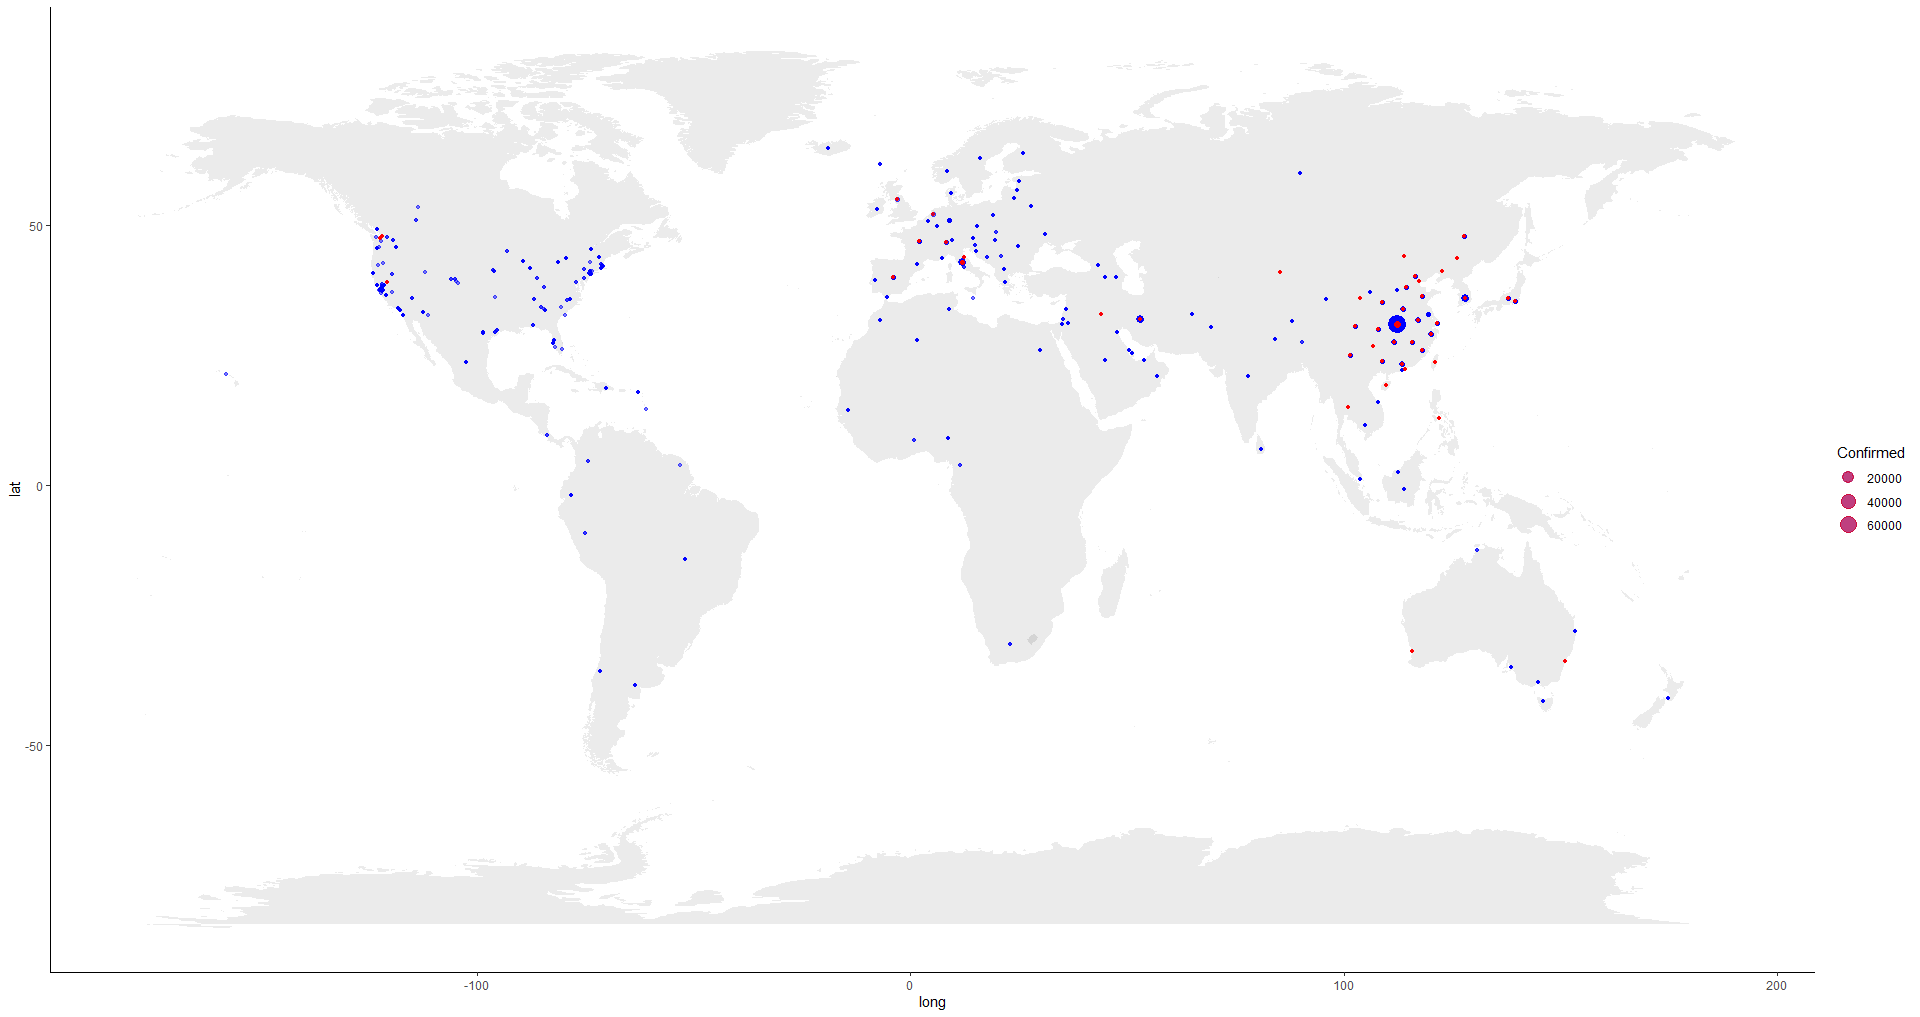

Ja sabemos como o vírus se aspalhou pelo mundo inteiro , então agora vamos verificar a quantidade de novos casos pelo mundo, para isso precisamos fazer uma adaptação do nosso dataset, para verificarmos quantos novos casos surgiram a cada dia e em cada país.

Agora montamos um novo dataframe com uma coluna adiconal que mostra a quantidade de novos casos naquele dia , e não mais somente o número acumulado de casos, como estava o nosso dataframe anterior.


In [122]:
test = data %>% arrange(Country.Region)
test = test[test$status == "Confirmed",]

diff= c()

for(i in 1:length(test$value)){
  if(i==1){
    d = 1
    diff = c(diff,d)
  }else if(test$Country.Region[i] == test$Country.Region[i-1]){
    d = test$value[i] - test$value[i-1]
    if(d<0){
      diff = c(diff,test$value[i])
    }else{
      diff = c(diff,d)
    }
  }else{
    d = test$value[i]
    diff = c(diff,d)
  }
}
new_cases = data.frame(test$Date,test$Country.Region,test$status,test$value,diff)
new_cases_wChina = new_cases %>% filter(new_cases$test.Country.Region != "China")

new_cases


test.Date,test.Country.Region,test.status,test.value,diff
<date>,<fct>,<fct>,<int>,<dbl>
20-02-24,Afghanistan,Confirmed,1,1
20-02-25,Afghanistan,Confirmed,1,0
20-02-26,Afghanistan,Confirmed,1,0
20-02-27,Afghanistan,Confirmed,1,0
20-02-28,Afghanistan,Confirmed,1,0
20-02-29,Afghanistan,Confirmed,1,0
20-03-01,Afghanistan,Confirmed,1,0
20-03-02,Afghanistan,Confirmed,1,0
20-03-03,Afghanistan,Confirmed,1,0


In [0]:
ggplot(new_cases_wChina, aes(x = test.Date, y = diff, fill = test.Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))

Quantidade de novos casos , exceto a china Dia por Dia

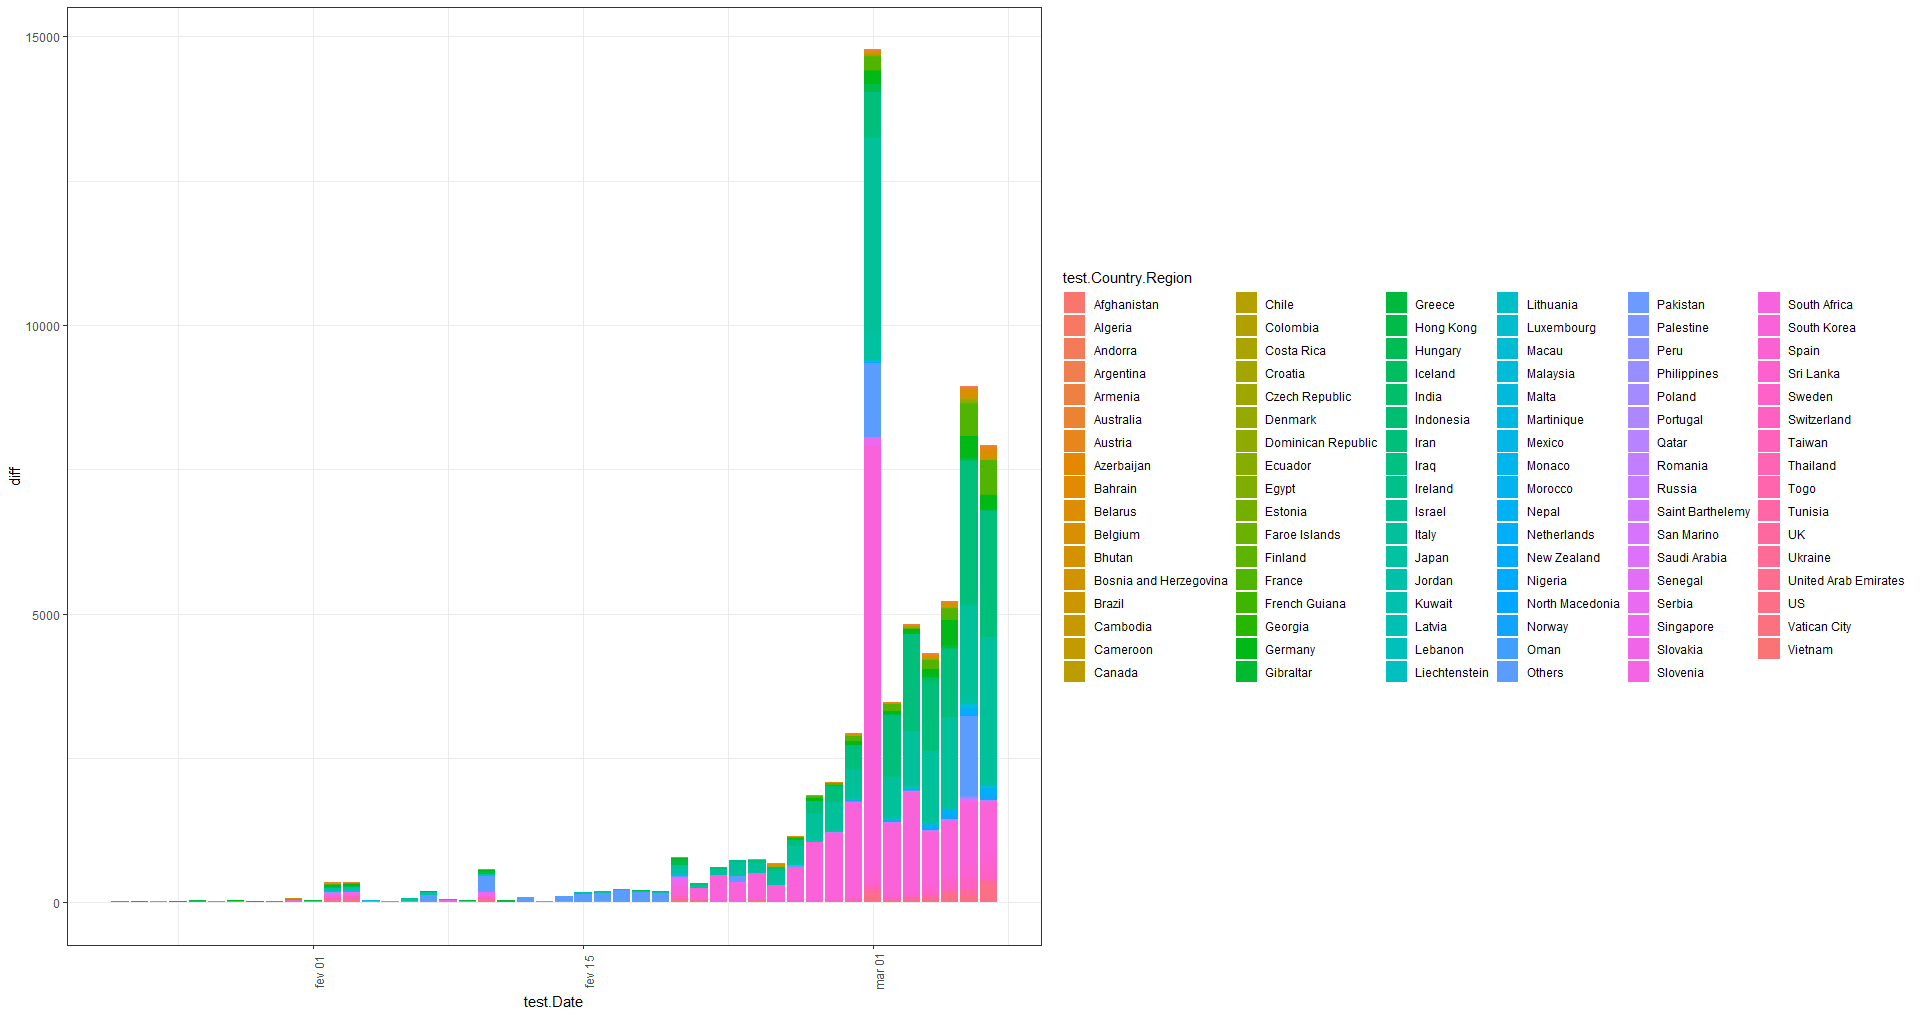

In [0]:
temp = new_cases %>% group_by(test.Country.Region) %>% summarise(Confirmed = max(test.value))

top20 = temp %>% top_n(20,Confirmed)
top20_wChina = temp %>% filter(test.Country.Region != "China") %>% top_n(20,Confirmed) 

top20_new = new_cases %>% filter(test.Country.Region %in% top20$test.Country.Region)

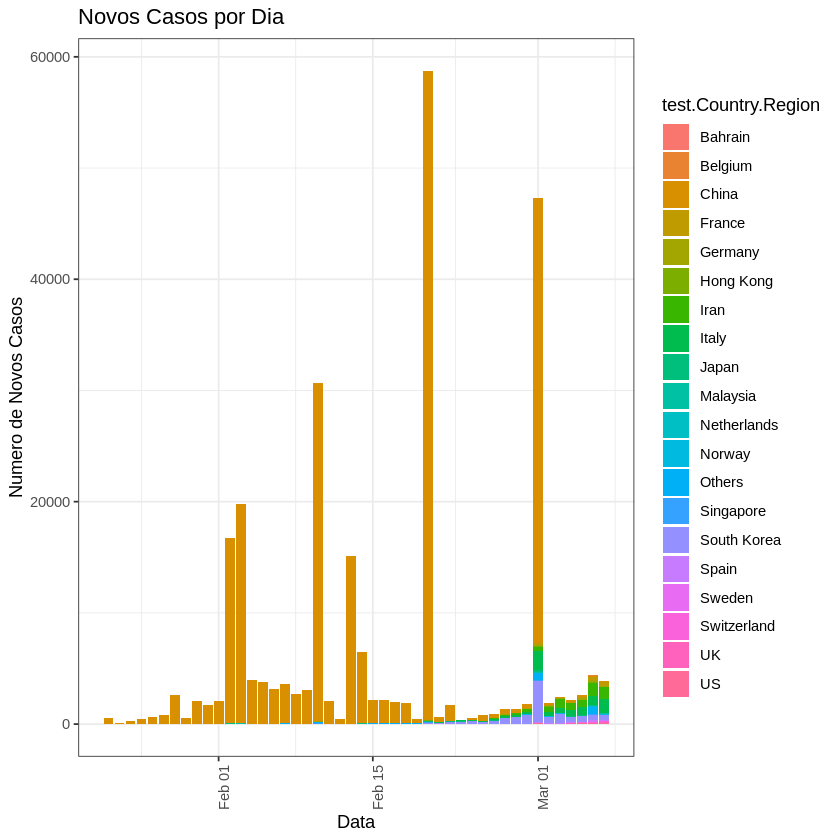

In [136]:
ggplot(top20_new, aes(x = test.Date, y = diff, fill = test.Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia", y = "Numero de Novos Casos", x = "Data")

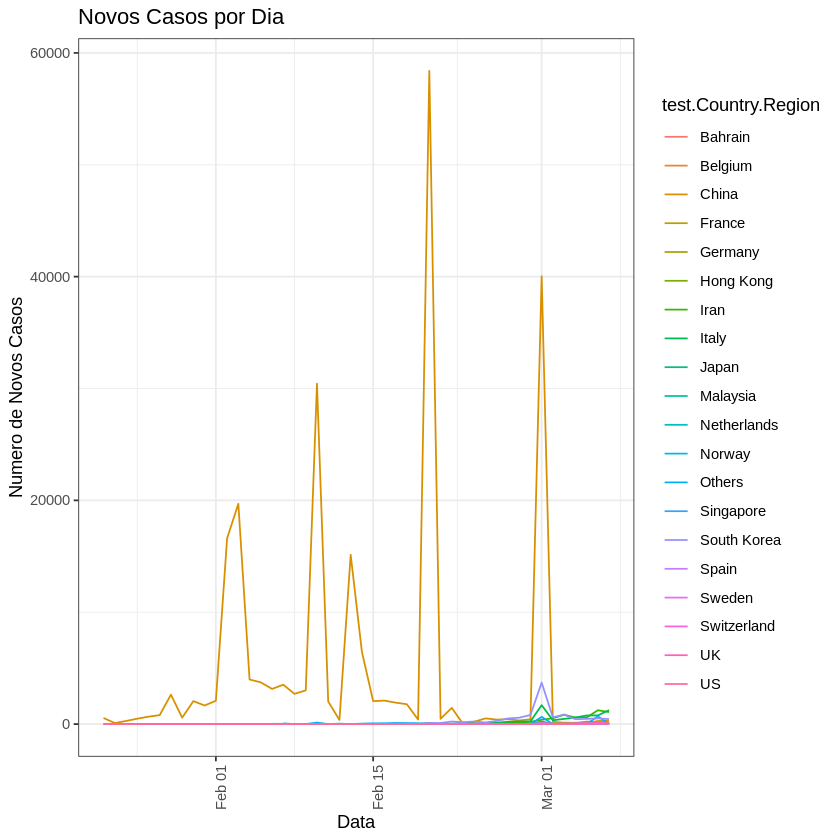

In [137]:
ggplot(top20_new, aes(x = test.Date, y = diff, color = test.Country.Region))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia", y = "Numero de Novos Casos", x = "Data")

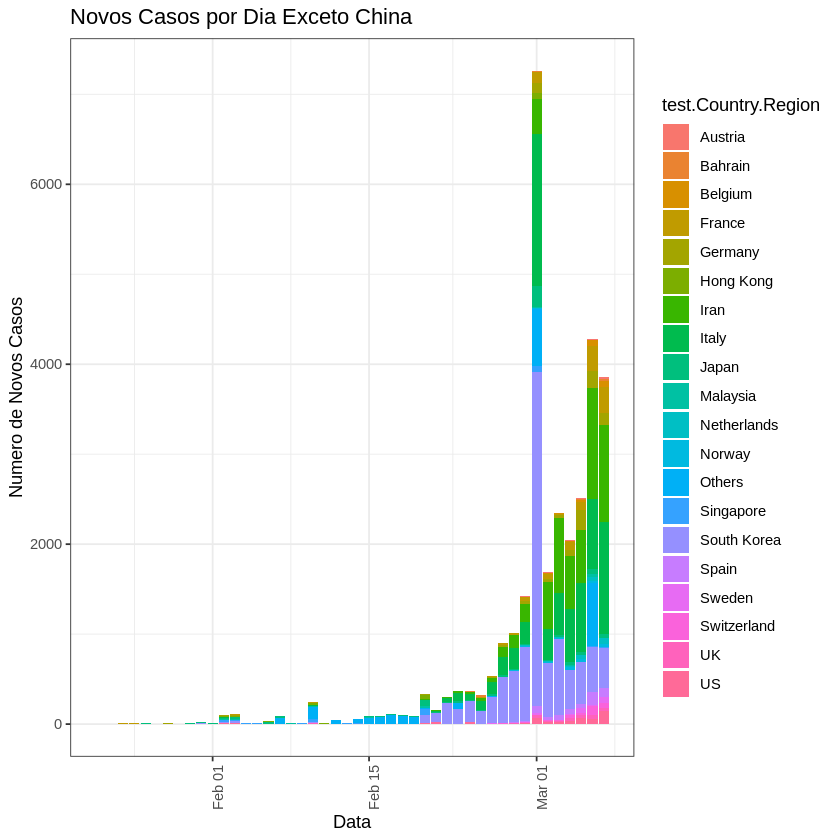

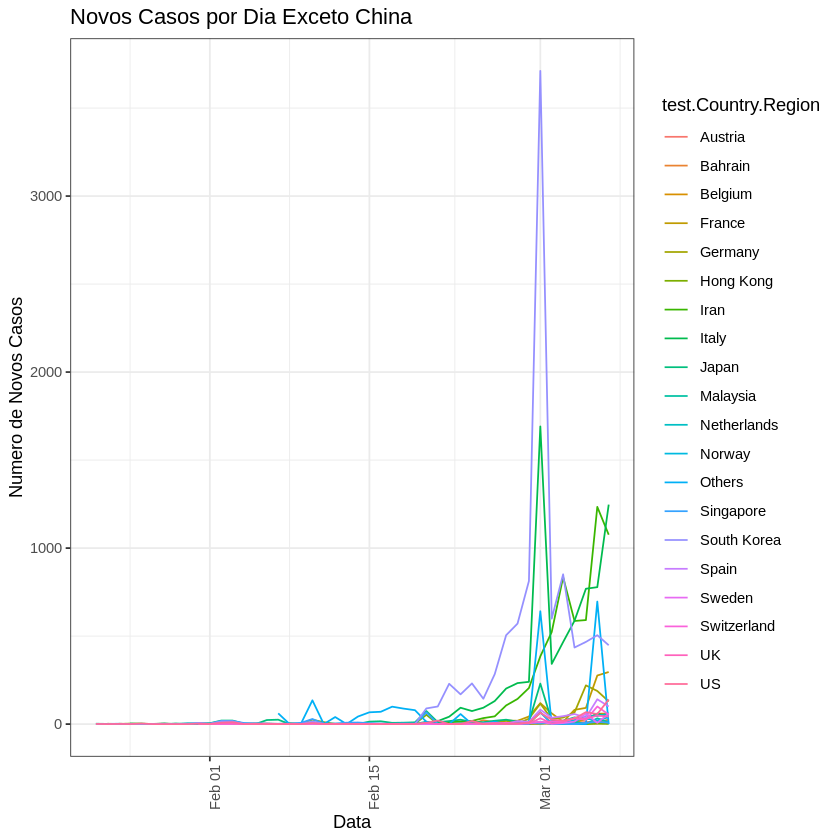

In [140]:
top20_new_wChina = new_cases %>% filter(test.Country.Region %in% top20_wChina$test.Country.Region)

ggplot(top20_new_wChina, aes(x = test.Date, y = diff, fill = test.Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia Exceto China", y = "Numero de Novos Casos", x = "Data")

  ggplot(top20_new_wChina, aes(x = test.Date, y = diff, color = test.Country.Region))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia Exceto China", y = "Numero de Novos Casos", x = "Data")